In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import mlflow
import mlflow.sklearn

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [53]:
df = pd.read_csv('../data/raw/liver_cirrhosis.csv')

# Encode categorical columns manually
df['Sex'] = df['Sex'].replace({'F': 1, 'M': 0})
df['Drug'] = df['Drug'].replace({'Placebo': 1, 'D-penicillamine': 0})
df['Ascites'] = df['Ascites'].replace({'Y': 1, 'N': 0})
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'Y': 1, 'N': 0})
df['Spiders'] = df['Spiders'].replace({'Y': 1, 'N': 0})
df['Edema'] = df['Edema'].replace({'Y': 1, 'N': 0, 'S': 2})
df['Status'] = df['Status'].replace({'C': 0, 'D': 1, 'CL': 2})

df = df.drop(columns=['Ascites'])
X = df.drop(columns='Stage')
y = df['Stage']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [55]:
# Prepare XGBoost Data 
df_xgb = df.copy()
df_xgb['Stage'] = df_xgb['Stage'] - 1
X_xgb = df_xgb.drop(columns='Stage')
y_xgb = df_xgb['Stage']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_xgb, y_xgb, test_size=0.2, random_state=42, shuffle=True
)

In [56]:
# MLflow Setup
mlflow.set_experiment("Liver cirrhosis exp")

example_input = pd.DataFrame(X_test[:5], columns=X_train.columns)

def log_experiment(model_name, model, params, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=f"{model_name}_run_{params.get('n_estimators', params.get('max_depth', 'default'))}"):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        
        # Log all parameters
        mlflow.log_params(params)
        mlflow.log_metric("accuracy", acc)

        mlflow.sklearn.log_model(model, name=model_name, input_example=example_input)

        print(f"\n{model_name} (Params: {params}) Results:")
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))

        # Confusion matrix plot 
        conf_mat = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm')
        plt.title(f"{model_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains m


Random_Forest (Params: {'n_estimators': 50, 'max_depth': 4, 'random_state': 42}) Results:
Accuracy: 0.6874
              precision    recall  f1-score   support

           1       0.71      0.69      0.70      1657
           2       0.59      0.65      0.62      1697
           3       0.79      0.73      0.76      1646

    accuracy                           0.69      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.69      0.69      0.69      5000



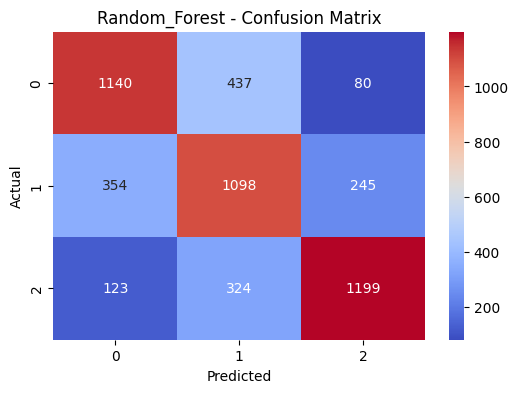

/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains m


Random_Forest (Params: {'n_estimators': 100, 'max_depth': 6, 'random_state': 42}) Results:
Accuracy: 0.8016
              precision    recall  f1-score   support

           1       0.82      0.78      0.80      1657
           2       0.72      0.81      0.76      1697
           3       0.88      0.82      0.85      1646

    accuracy                           0.80      5000
   macro avg       0.81      0.80      0.80      5000
weighted avg       0.81      0.80      0.80      5000



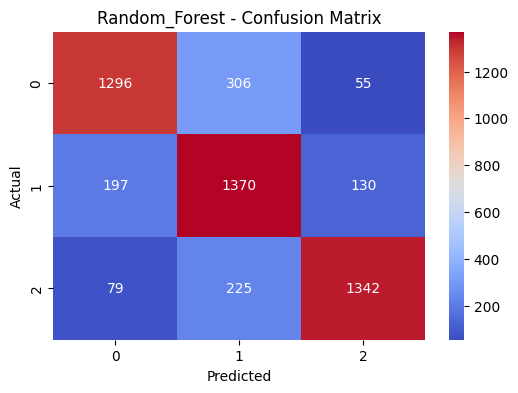

/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains m


Random_Forest (Params: {'n_estimators': 200, 'max_depth': 4, 'random_state': 42}) Results:
Accuracy: 0.6880
              precision    recall  f1-score   support

           1       0.71      0.69      0.70      1657
           2       0.60      0.64      0.62      1697
           3       0.78      0.74      0.76      1646

    accuracy                           0.69      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.69      0.69      0.69      5000



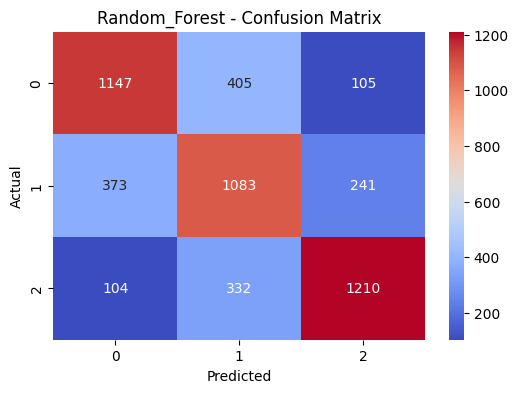

In [57]:
# Random Forest Tuning
rf_params_list = [
    {"n_estimators": 50, "max_depth": 4, "random_state": 42},
    {"n_estimators": 100, "max_depth": 6, "random_state": 42},
    {"n_estimators": 200, "max_depth": 4, "random_state": 42}
]

for params in rf_params_list:
    model_rf = RandomForestClassifier(**params)
    log_experiment("Random_Forest", model_rf, params, X_train, y_train, X_test, y_test)

/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains m


XGBoost (Params: {'n_estimators': 50, 'learning_rate': 0.1, 'random_state': 42, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}) Results:
Accuracy: 0.9108
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1657
           1       0.86      0.93      0.89      1697
           2       0.94      0.92      0.93      1646

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



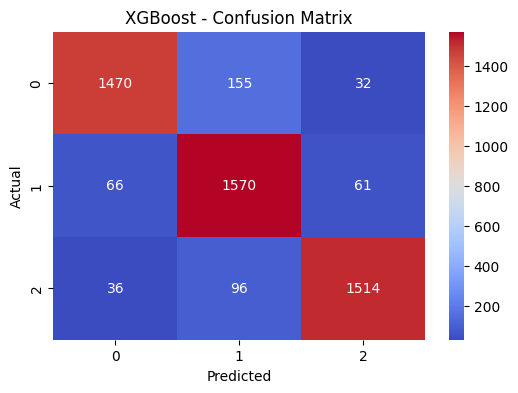

/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains m


XGBoost (Params: {'n_estimators': 100, 'learning_rate': 0.01, 'random_state': 42, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}) Results:
Accuracy: 0.8254
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1657
           1       0.76      0.81      0.78      1697
           2       0.88      0.83      0.86      1646

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



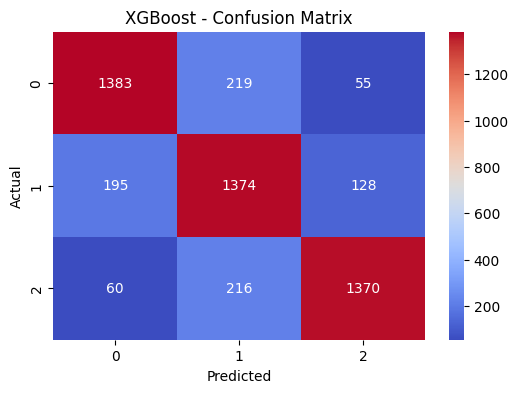

/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains m


XGBoost (Params: {'n_estimators': 200, 'learning_rate': 0.1, 'random_state': 42, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}) Results:
Accuracy: 0.9564
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1657
           1       0.94      0.96      0.95      1697
           2       0.97      0.96      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



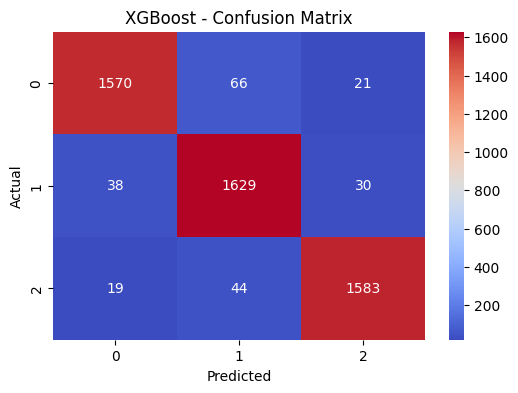

In [58]:
# XGBoost Tuning
xgb_params_list = [
    {"n_estimators": 50, "learning_rate": 0.1, "random_state": 42},
    {"n_estimators": 100, "learning_rate": 0.01, "random_state": 42},
    {"n_estimators": 200, "learning_rate": 0.1, "random_state": 42}
]

for params in xgb_params_list:
    # XGBoost requires specific parameters for multi-class classification
    xgb_full_params = {
        **params,
        "objective": 'multi:softmax',
        "num_class": 3,
        "eval_metric": 'mlogloss'
    }
    model_xgb = XGBClassifier(**xgb_full_params)
    log_experiment("XGBoost", model_xgb, xgb_full_params, X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb)

In [59]:
!mlflow ui
# !mlflow ui --port 5002

/opt/anaconda3/envs/mlops/lib/python3.11/site-packages/pydantic/_internal/_config.py:323: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)
INFO:     Uvicorn running on http://127.0.0.1:5000 (Press CTRL+C to quit)
INFO:     Started parent process [8867]
INFO:     Started server process [8871]
INFO:     Started server process [8872]
INFO:     Started server process [8870]
INFO:     Waiting for application startup.
INFO:     Waiting for application startup.
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Application startup complete.
INFO:     Application startup complete.
INFO:     Started server process [8869]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
^C

Aborted!
INFO: